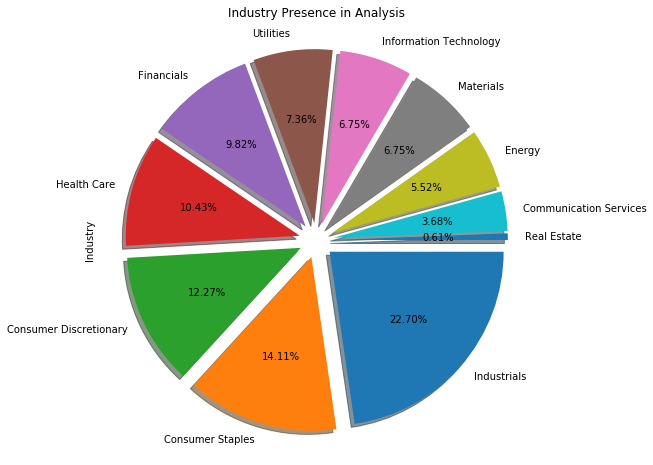

In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt

master_ds = '../Resources/Master_Datasets/master_dataset_1577075841.csv'
master_industry = '../Resources/Query List with Sector.csv'

master_df = pd.read_csv(master_ds)
industry_df = pd.read_csv(master_industry)

industries = pd.DataFrame(master_df['Ticker'].unique()).rename(columns={0:'ticker'}).merge(industry_df, on='ticker')

industries['Industry'].value_counts().plot(
    kind='pie',
    figsize=(8,8),
    shadow=True,
    title='Industry Presence in Analysis',
    counterclock=False,
    autopct='%.2f%%',
    explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
)

In [41]:
topindustries_df = industries.groupby(["Industry"]).sum()
top5industries = topindustries_df.nlargest(5, 'profit ($ millions)').reset_index()
top5industries

,Industry,Unnamed: 0,occurance,profit ($ millions),revenue ($ millions),year
0,Industrials,2891,1070,150537.8,1211096.1,74699
1,Financials,907,411,143848.9,964098.1,32304
2,Health Care,1073,475,109717.0,1217981.2,34323
3,Consumer Staples,2083,668,87096.5,888204.0,46425
4,Energy,510,255,86560.3,1011755.2,18169


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

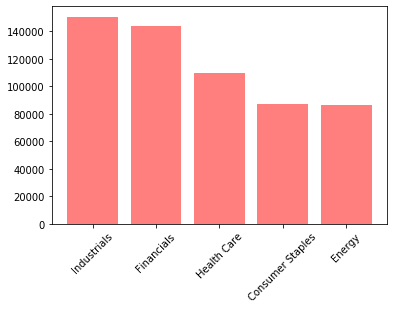

In [48]:
x_axis = top5industries['Industry']
y_axis = top5industries['profit ($ millions)']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

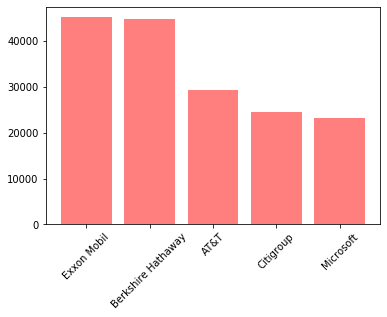

In [49]:
top5df = industries.nlargest(5, 'profit ($ millions)')

x_axis = top5df['company']
y_axis = top5df['profit ($ millions)']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

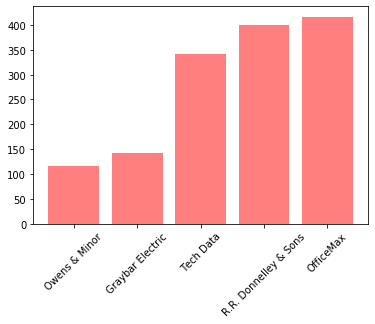

In [50]:
bottom5df = industries.nsmallest(5, 'profit ($ millions)')
x_axis = bottom5df['company']
y_axis = bottom5df['profit ($ millions)']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=45)